In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv("custom_sample_mass_radius_k2_15.csv", 
                   header=None, 
                   names=["Mass", "Radius", "k2", "Type"], 
                   low_memory=False)

m_r_p = data.iloc[1:, :-1]
star_type = data.iloc[1:, -1]


X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)


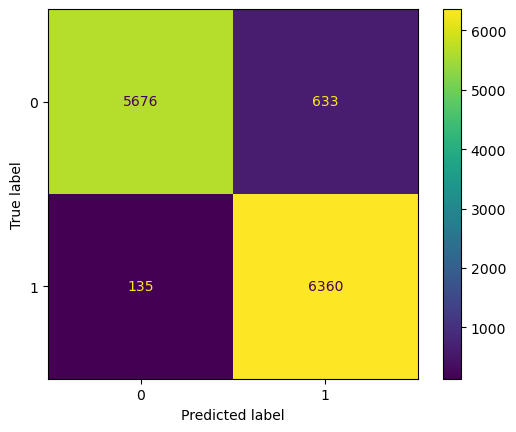

accuracy score:94.00%
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6309
           1       0.91      0.98      0.94      6495

    accuracy                           0.94     12804
   macro avg       0.94      0.94      0.94     12804
weighted avg       0.94      0.94      0.94     12804



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report ,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
classifier = DecisionTreeClassifier(criterion="gini",max_depth=2,min_samples_leaf=10, min_samples_split=15, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
prediction = classifier.predict(X_test)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()
print(f"accuracy score:{accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))


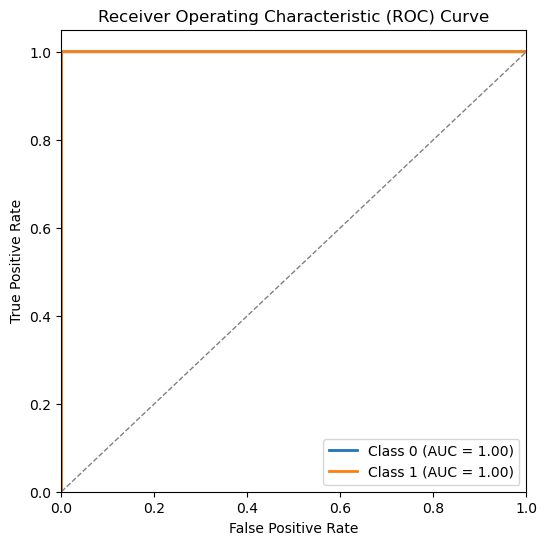

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model
classifier = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=12, max_features="log2", random_state=0)
classifier.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Ακρίβειες σε κάθε fold: [0.99390815 0.99265854 0.97516401 0.97149106 0.93751465]
Μέση ακρίβεια (CV=5): 97.41%
Τυπική απόκλιση: 2.04%


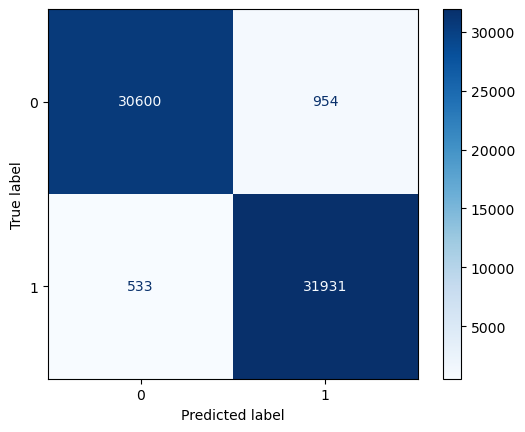

[Text(0.625, 0.875, 'x[2] <= 0.083\ngini = 0.5\nsamples = 64018\nvalue = [31554.0, 32464.0]'),
 Text(0.5, 0.625, 'x[0] <= 1.497\ngini = 0.189\nsamples = 35281\nvalue = [31554, 3727]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[0] <= 1.388\ngini = 0.019\nsamples = 27851\nvalue = [27583, 268]'),
 Text(0.125, 0.125, 'gini = 0.002\nsamples = 26396\nvalue = [26369.0, 27.0]'),
 Text(0.375, 0.125, 'gini = 0.276\nsamples = 1455\nvalue = [1214, 241]'),
 Text(0.75, 0.375, 'x[2] <= 0.048\ngini = 0.498\nsamples = 7430\nvalue = [3971.0, 3459.0]'),
 Text(0.625, 0.125, 'gini = 0.148\nsamples = 3282\nvalue = [3017, 265]'),
 Text(0.875, 0.125, 'gini = 0.354\nsamples = 4148\nvalue = [954, 3194]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 28737\nvalue = [0, 28737]'),
 Text(0.6875, 0.75, '  False')]

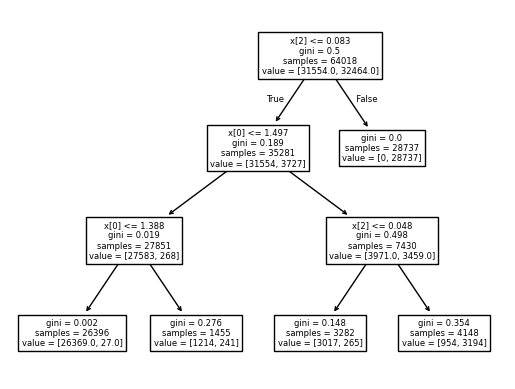

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Φόρτωσε το dataset
data = pd.read_csv("custom_sample_mass_radius_k2_15.csv", 
                   header=None, 
                   names=["Mass", "Radius", "k2", "Type"], 
                   low_memory=False)

# Χωρίζουμε features και labels
X = data.iloc[1:, :-1]   # Mass, Radius, k2
y = data.iloc[1:, -1]    # Type

# Ορισμός Decision Tree classifier
classifier = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_leaf=10,
    min_samples_split=15,
    random_state=0
)

# 5-fold cross validation
scores = cross_val_score(classifier, X, y, cv=5, scoring="accuracy")

print("Ακρίβειες σε κάθε fold:", scores)
print(f"Μέση ακρίβεια (CV=5): {scores.mean() * 100:.2f}%")
print(f"Τυπική απόκλιση: {scores.std() * 100:.2f}%")

# --- Αν θες confusion matrix από ΟΛΟ το dataset ---
classifier.fit(X, y)
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap="Blues")
plt.show()

plot_tree(classifier)


📊 Αποτελέσματα ανά fold (accuracy): [0.94111215 0.93955014 0.94064355 0.94579819 0.94314277 0.94251796
 0.93970634 0.94111215 0.94469614 0.9395407 ]
✅ Μέση ακρίβεια (CV=5): 94.18%
± Τυπική απόκλιση: 0.21%
95% Διάστημα Εμπιστοσύνης: 94.05% – 94.31%

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     31554
           1       1.00      0.89      0.94     32464

    accuracy                           0.94     64018
   macro avg       0.95      0.94      0.94     64018
weighted avg       0.95      0.94      0.94     64018



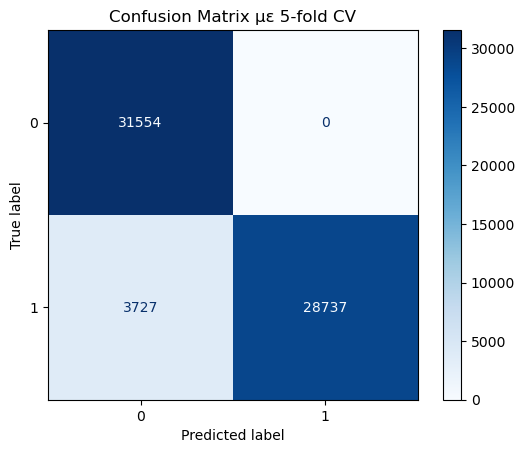

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ==================================================
# 1) Φόρτωμα δεδομένων
# ==================================================
data = pd.read_csv("custom_sample_mass_radius_k2_15.csv", 
                   header=None, 
                   names=["Mass", "Radius", "k2", "Type"], 
                   low_memory=False)

# Αφαιρούμε τυχόν header row (πρώτη γραμμή με strings)
X = data.iloc[1:, :-1]   # Features: Mass, Radius, k2
# Μετατροπή του label σε int
y = data.iloc[1:, -1].astype(int)
    # Labels: Type

# ==================================================
# 2) Ορισμός ταξινομητή (Decision Tree)
# ==================================================
classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=2,
    min_samples_leaf=10,
    min_samples_split=15,
    random_state=0
)

# ==================================================
# 3) StratifiedKFold CV (για balanced κλάσεις)
# ==================================================
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation με accuracy, precision, recall, f1
scores = cross_validate(classifier, X, y, cv=cv,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        return_train_score=False)

print("📊 Αποτελέσματα ανά fold (accuracy):", scores["test_accuracy"])
print("✅ Μέση ακρίβεια (CV=5): {:.2f}%".format(scores["test_accuracy"].mean() * 100))
print("± Τυπική απόκλιση: {:.2f}%".format(scores["test_accuracy"].std() * 100))

# 95% Confidence Interval (για accuracy)
ci95 = 1.96 * (scores["test_accuracy"].std() / np.sqrt(cv.get_n_splits()))
print("95% Διάστημα Εμπιστοσύνης: {:.2f}% – {:.2f}%".format(
    (scores["test_accuracy"].mean() - ci95) * 100,
    (scores["test_accuracy"].mean() + ci95) * 100
))

# ==================================================
# 4) Predictions για Confusion Matrix
# ==================================================
y_pred = cross_val_predict(classifier, X, y, cv=cv)

print("\n📄 Classification Report:\n", classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

disp.plot(cmap="Blues")
plt.title("Confusion Matrix με 5-fold CV")
plt.show()


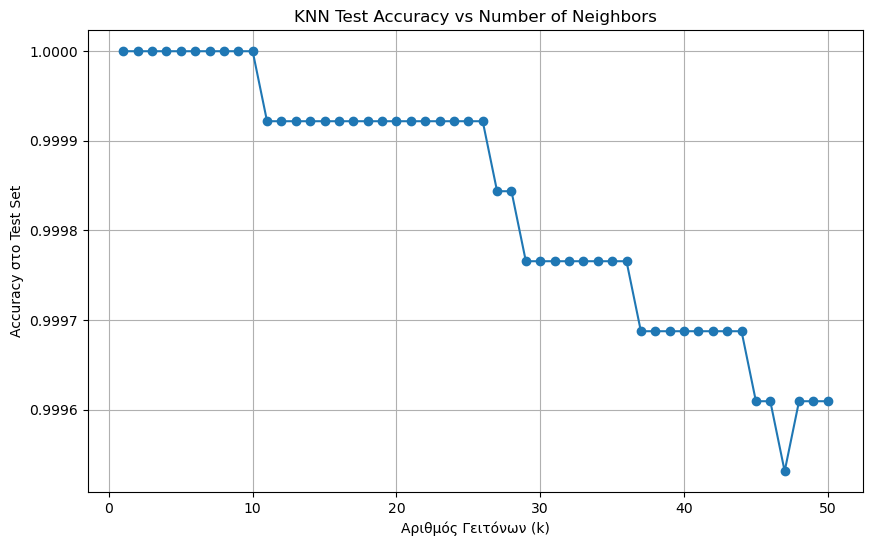

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 📂 Διάβασε τα δεδομένα
data = pd.read_csv("custom_sample_mass_radius_k2_15.csv", 
                   header=None, 
                   names=["Mass", "Radius", "k2", "Type"], 
                   low_memory=False)

X = data.iloc[1:, :-1]   # features
y = data.iloc[1:, -1]    # target (star type)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ⚖️ Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Δοκιμή διαφορετικών k
k_values = range(1, 51)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 📊 Plot
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Αριθμός Γειτόνων (k)")
plt.ylabel("Accuracy στο Test Set")
plt.title("KNN Test Accuracy vs Number of Neighbors")
plt.grid(True)
plt.show()
